# This will create train_folds.csv
* K-Folds cross-validator Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df_train.shape

(300000, 26)

In [3]:
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


<AxesSubplot:>

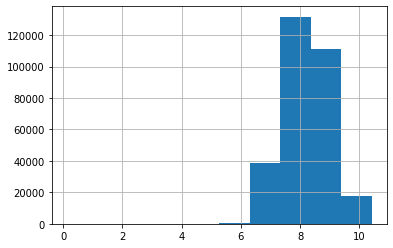

In [4]:
df_train.target.hist()

In [12]:
## Col for discriminating by folds
df_train["kfold"] = -1
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,-1
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,-1
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,-1
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,-1
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,-1


In [14]:
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indices, valid_indices) in enumerate(kfold.split(X=df_train)):
    #print(fold,  train_indices, valid_indices)
    df_train.loc[valid_indices, "kfold"] = fold

In [15]:
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,0
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,2
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,4
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,3
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,1


In [16]:
df_train.kfold.value_counts()

0    60000
1    60000
2    60000
3    60000
4    60000
Name: kfold, dtype: int64

<AxesSubplot:>

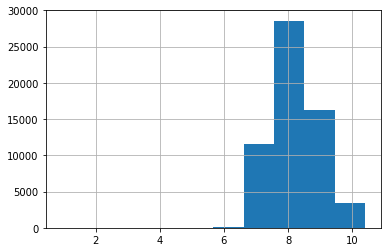

In [18]:
#df_train[df_train.kfold==1].target.hist()
df_train[df_train.kfold==4].target.hist()

## Create Folds CSV

In [19]:
df_train.to_csv("train_folds.csv", index=False)